!cp /content/drive/MyDrive/Curruira/shap_plots.py .
!cp /content/drive/MyDrive/Curruira/models.py .
!ls

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
directory = '/content/drive/MyDrive/Curruira'


In [1]:
directory = "."

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import librosa
from scipy.interpolate import UnivariateSpline
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.signal import hilbert
# import maad
import shap_plots
from sklearn.metrics import ConfusionMatrixDisplay
import random
import os

In [3]:
# Open a file in binary mode and write the pickled list to it
with open(os.path.join(directory,'shap_values.pkl'), 'rb') as f:
    shap_values = pickle.load(f)

# Open the pickled file in binary mode and read the pickled data
with open(os.path.join(directory,'labels.pkl'), 'rb') as f:
    labels = pickle.load(f) # A eh amostra impactada e B nao impactada

with open(os.path.join(directory,'wav_records.pkl'), 'rb') as f:
    wav_records = pickle.load(f)

with open(os.path.join(directory,'spectrograms.pkl'), 'rb') as f:
    spectrograms = pickle.load(f)

with open(os.path.join(directory,'biophony_predictions.pkl'), 'rb') as f:
    biophony_predictions = pickle.load(f)

labels = 1*(labels=='amostraA') # A eh amostra impactada e B nao impactada

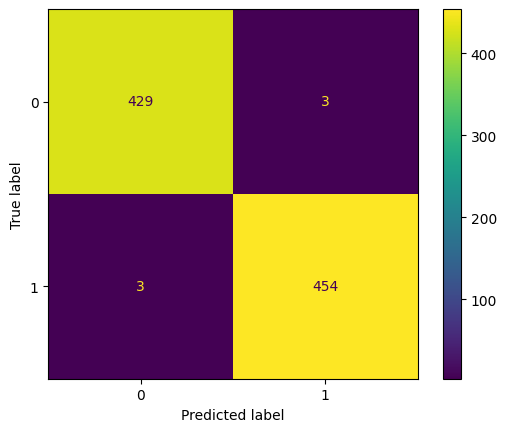

In [4]:
predictions = np.argmax(biophony_predictions, axis=-1)
ConfusionMatrixDisplay.from_predictions(labels, predictions)
plt.show()

In [5]:
fs = 22050
freqs = np.linspace(0, fs/2, num=257)
times = np.linspace(0, 2, num=2*fs)
winlen = 512
winstep = 64
nfft = 512  # 1024 default

TP = np.where((predictions == 1) * (labels == 1))[0][1]
TN = np.where((predictions == 0) * (labels == 0))[0][1]
FP = np.where((predictions == 1) * (labels == 0))[0][0]
FN = np.where((predictions == 0) * (labels == 1))[0][0]

samples = [TP, TN, FP, FN] # TN, TP, FP, FN
sample_titles = ['TP', 'TN', 'FP', 'FN']
samples

[6, 2, 119, 562]

In [6]:
idx = np.where(labels != np.argmax(biophony_predictions, axis=-1))
print(idx)
print(labels[idx])
print(np.argmax(biophony_predictions, axis=-1)[idx])

(array([119, 562, 634, 700, 764, 850], dtype=int64),)
[0 1 0 0 1 1]
[1 0 1 1 0 0]


TP


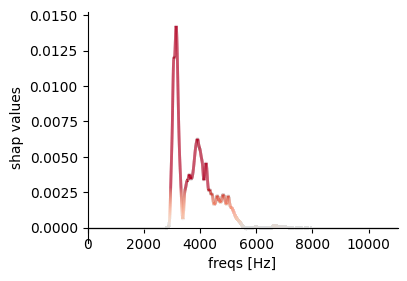

TN


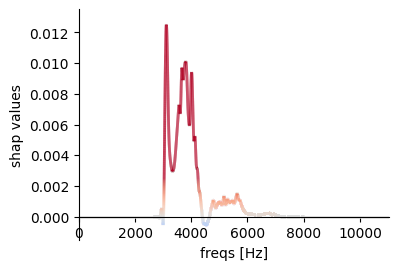

FP


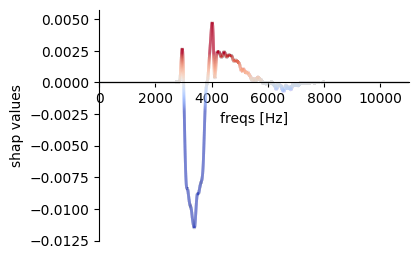

FN


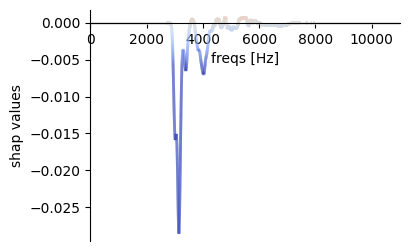

In [7]:
for i, title in zip(samples, sample_titles):
    print(title)
    fig = shap_plots.shape_spectrum_plot(i, shap_values, labels, fs=fs)

TP


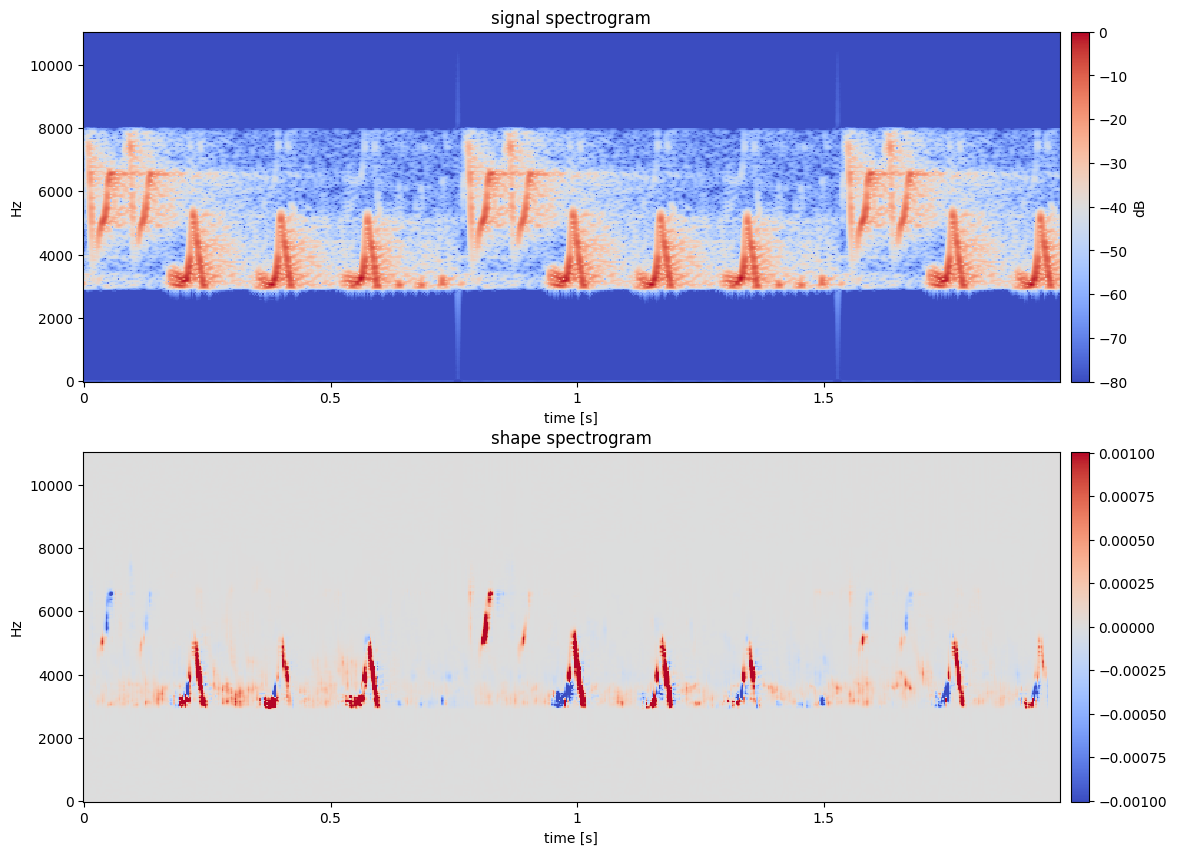

TN


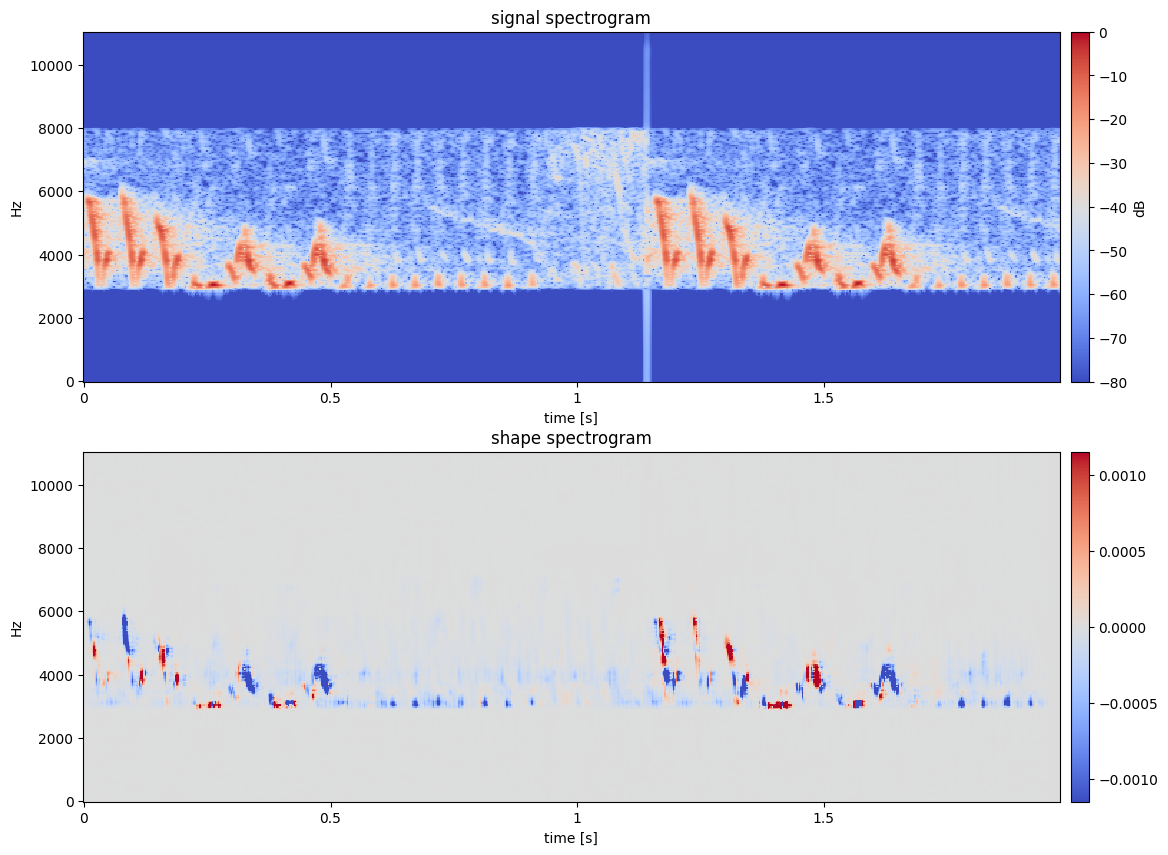

FP


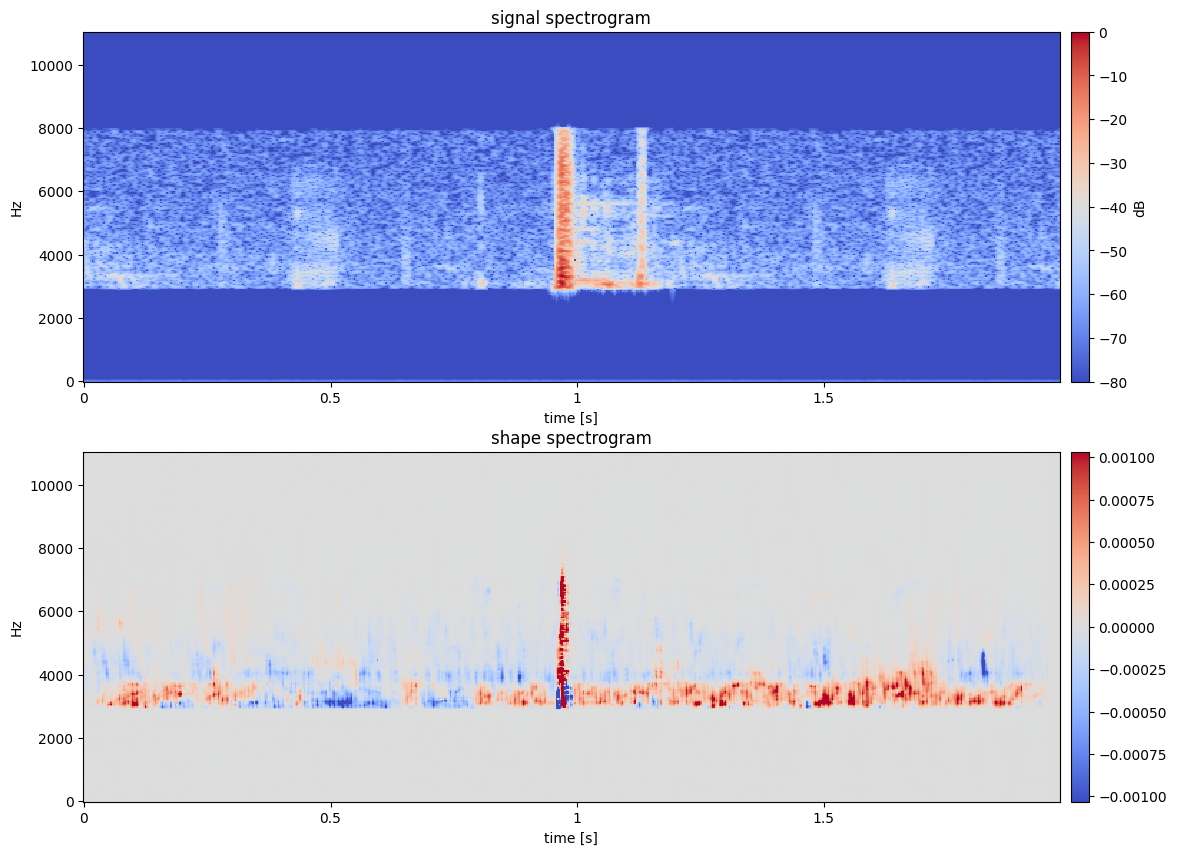

FN


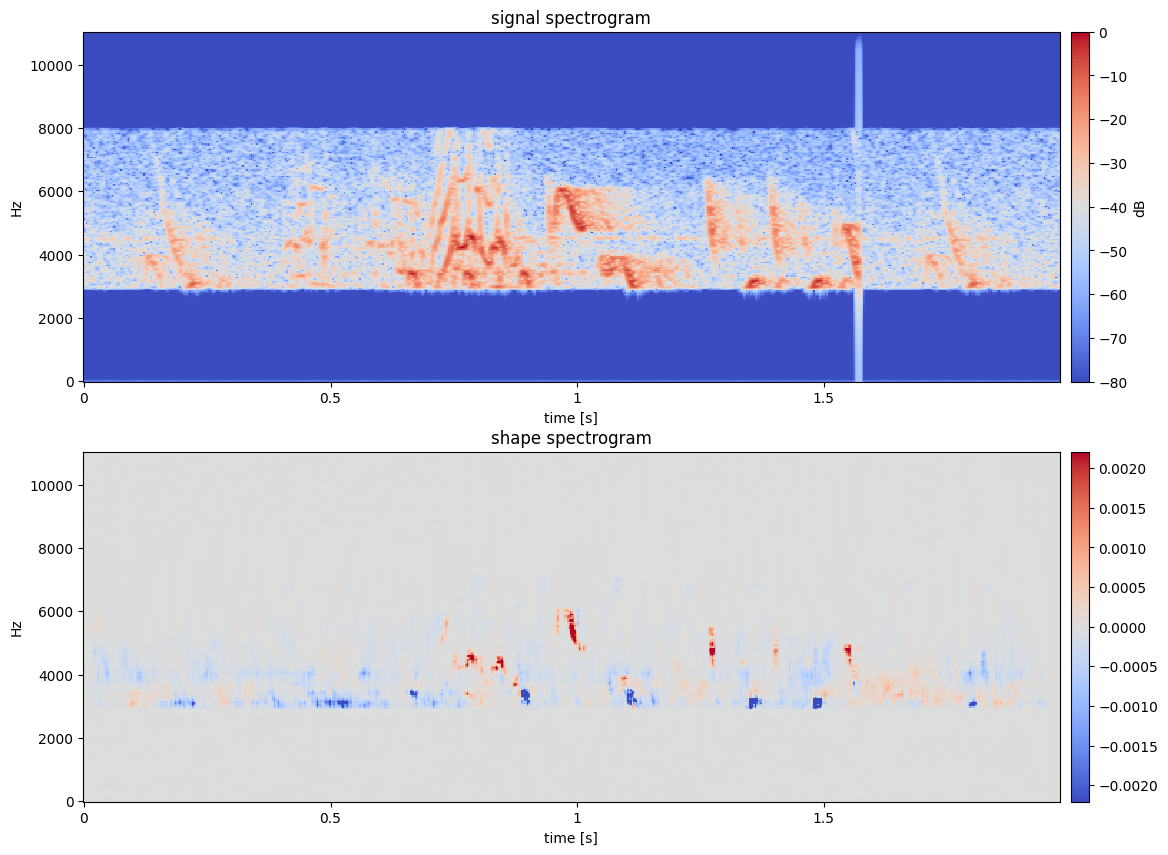

In [8]:
for i, title in zip(samples, sample_titles):
    print(title)
    shap_plots.shape_spectrogram_plot(i, spectrograms, shap_values, fs, nfft, winstep, winlen)

TP


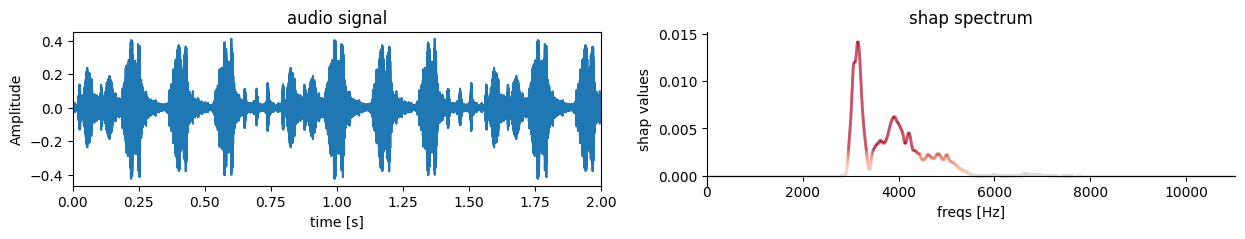

TN


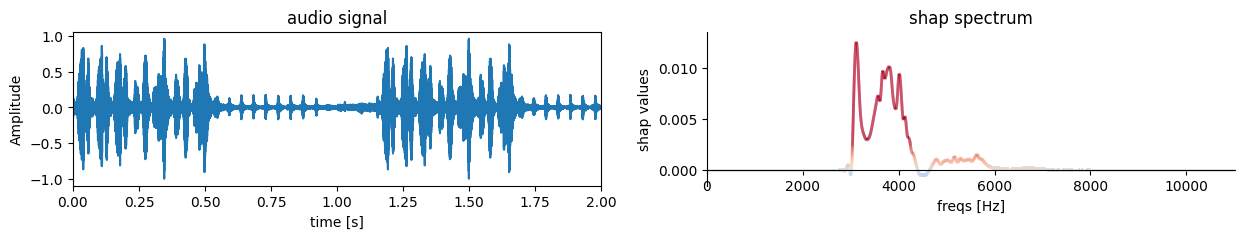

FP


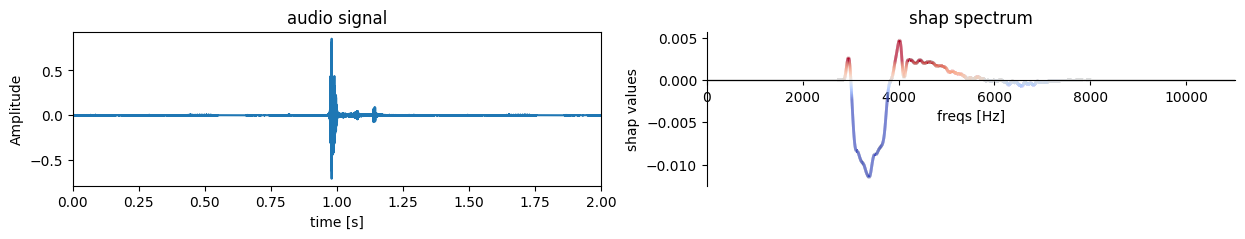

FN


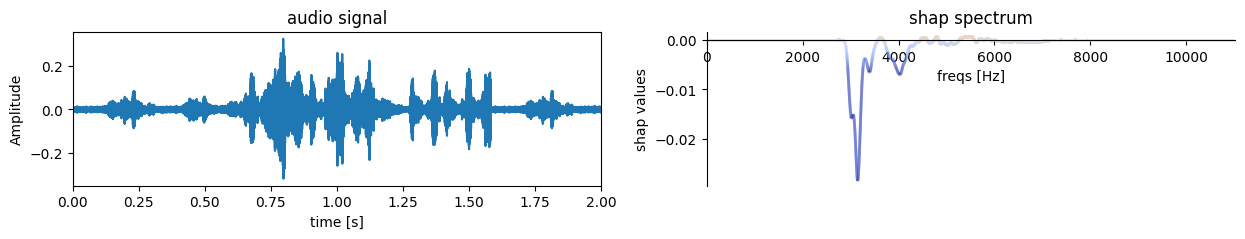

In [9]:
for i, title in zip(samples, sample_titles):
    print(title)
    shap_plots.shap_signal_spectrum(i, times, wav_records, shap_values, labels, fs)

TP


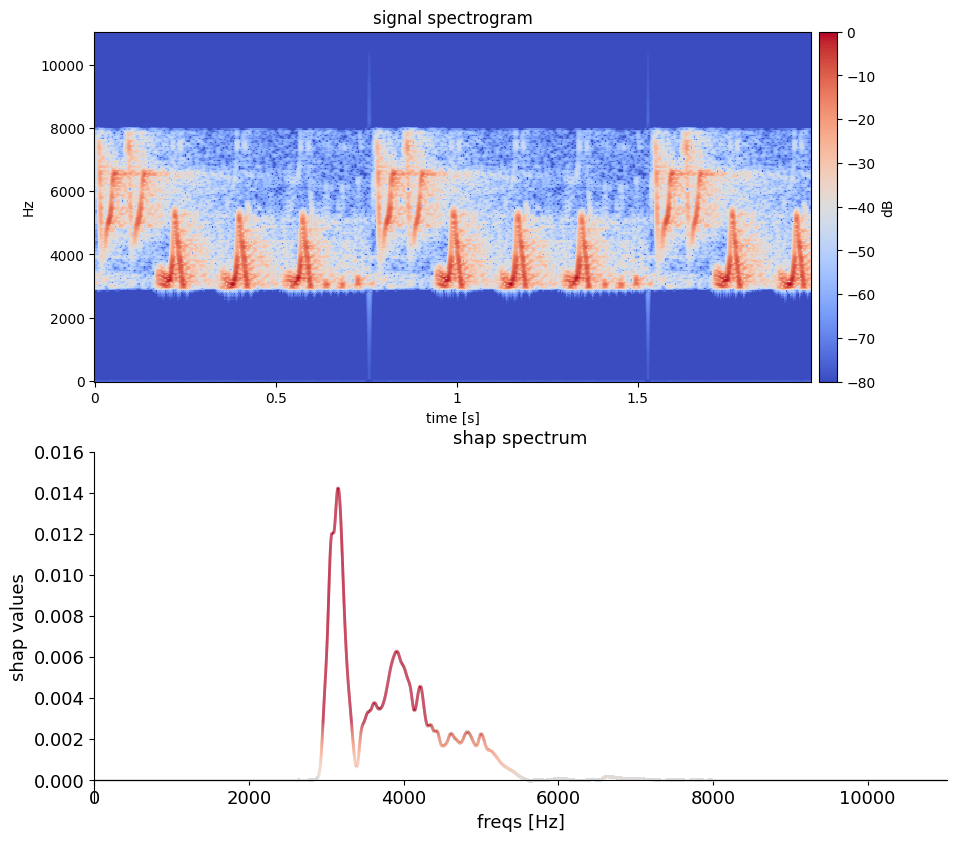

TN


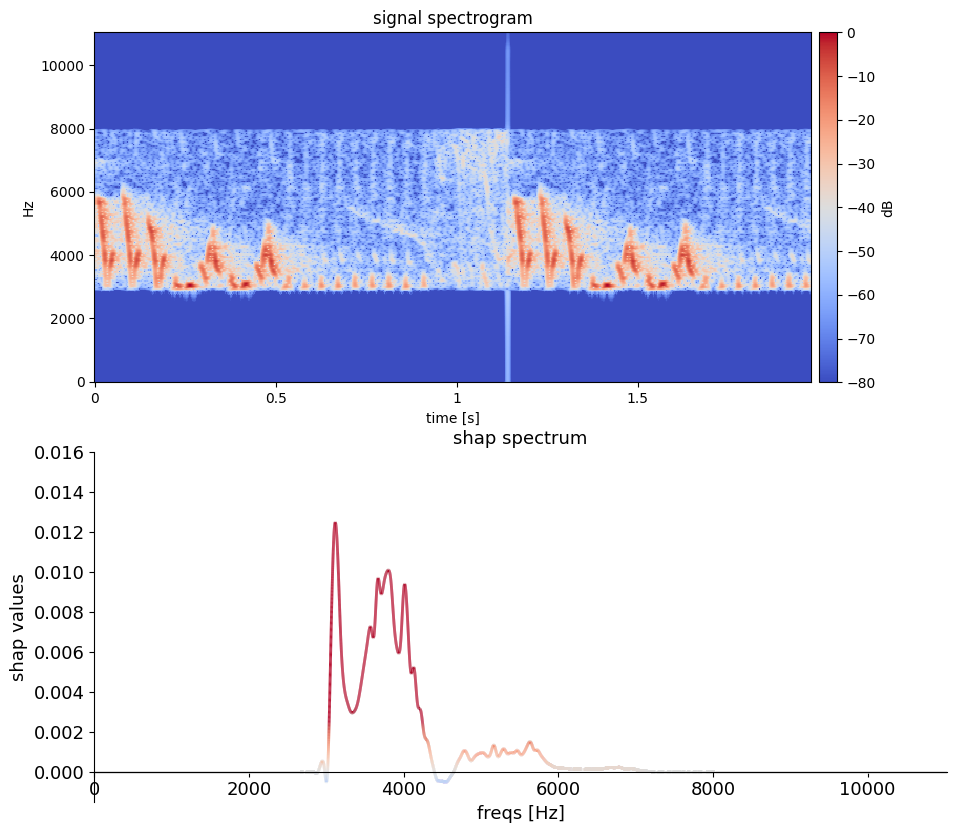

FP


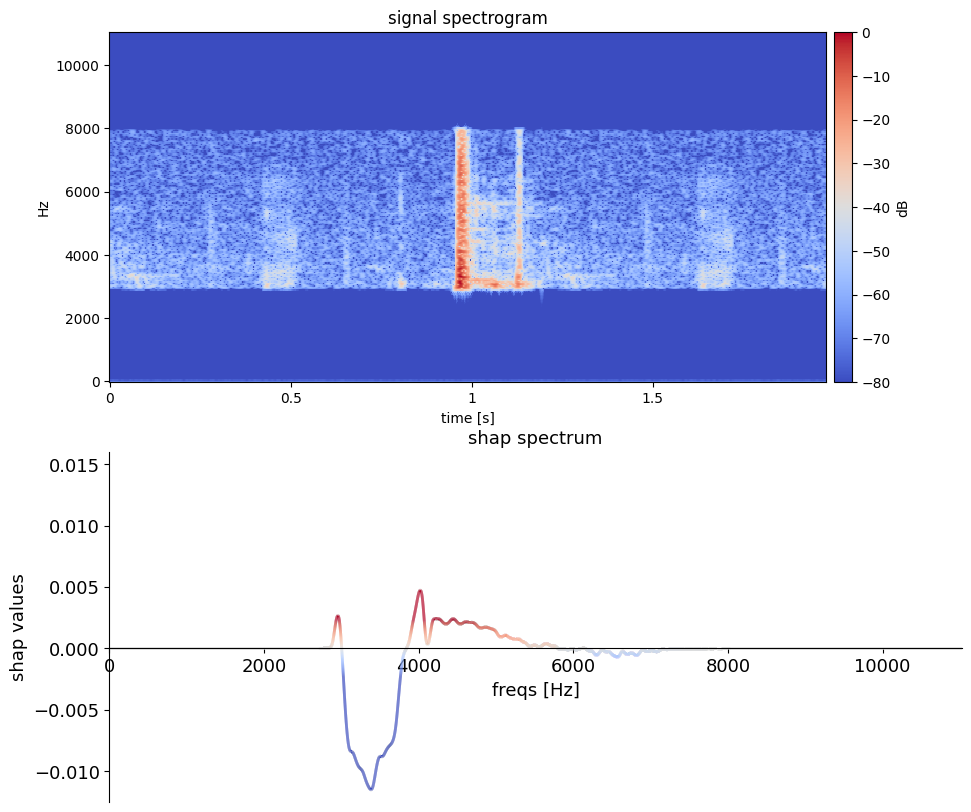

FN


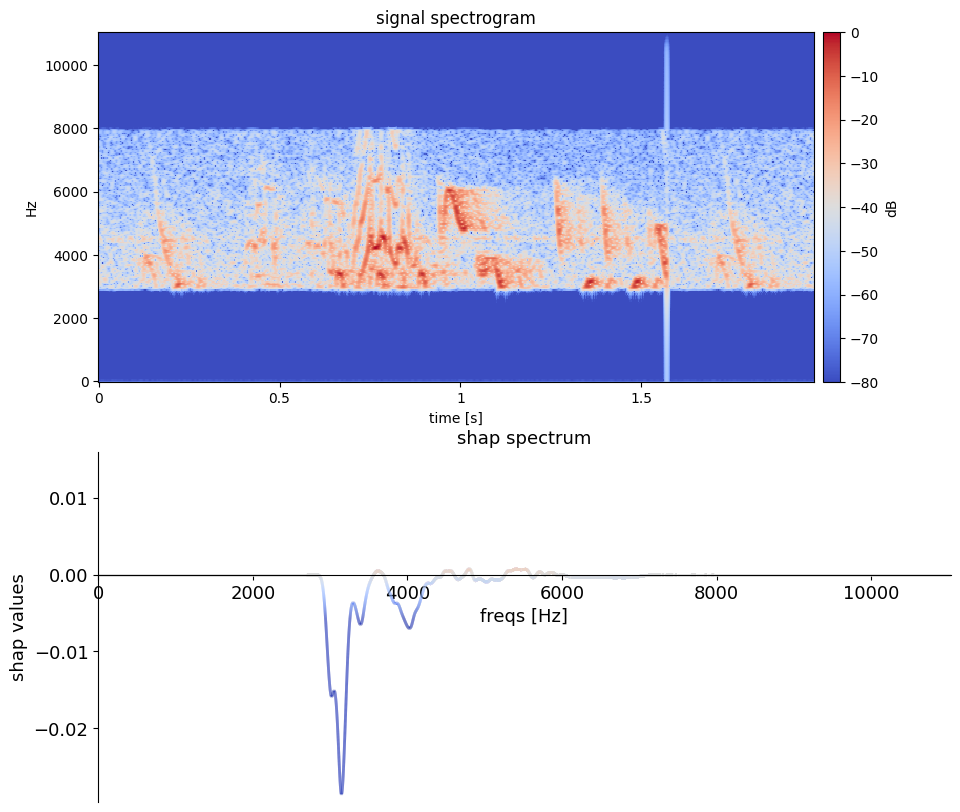

In [10]:
for i, title in zip(samples, sample_titles):
    print(title)
    shap_plots.shap_spectogram_spectrum(i, spectrograms,  nfft, winstep, winlen, shap_values, labels, fs)

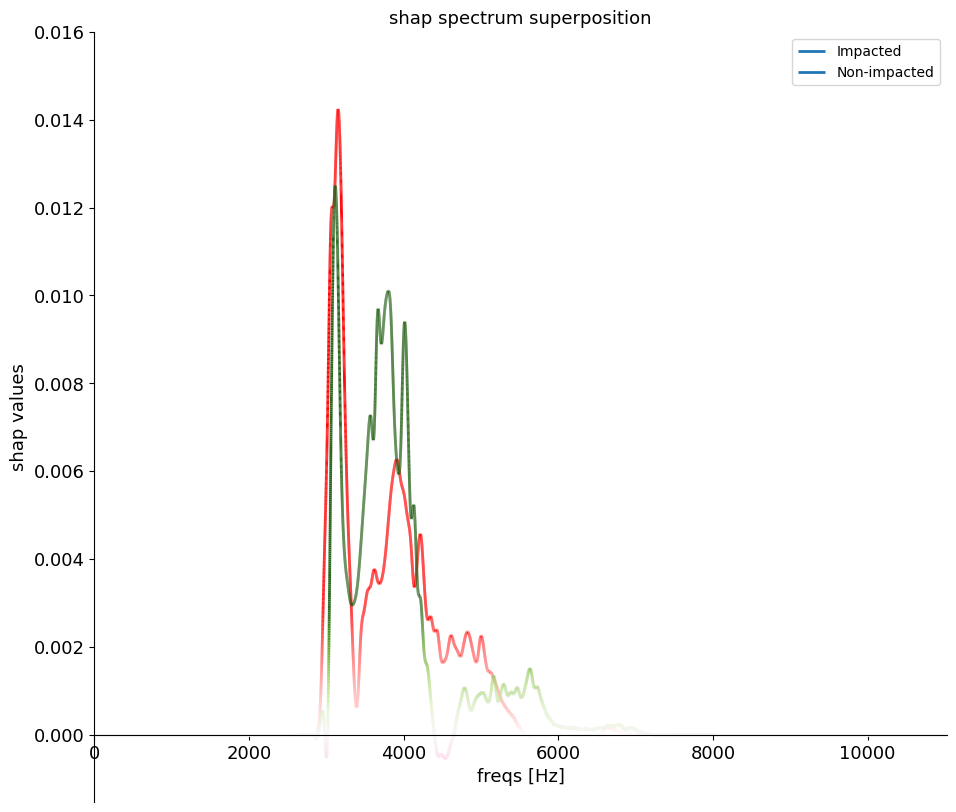

In [11]:
shap_plots.shap_spectrum_superposition(samples[0],samples[1],  shap_values, labels, fs)

TP


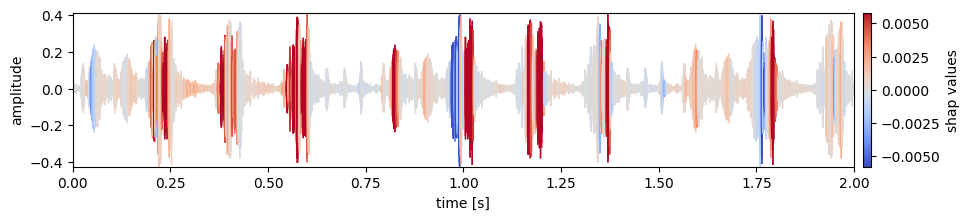

TN


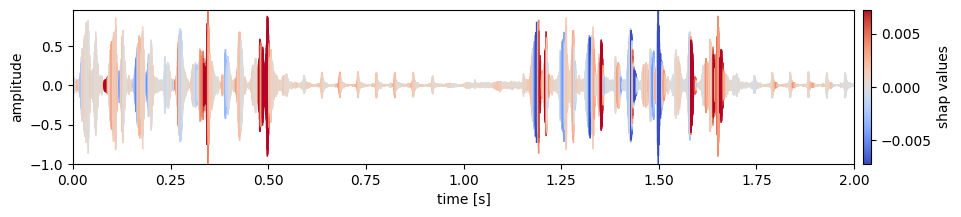

FP


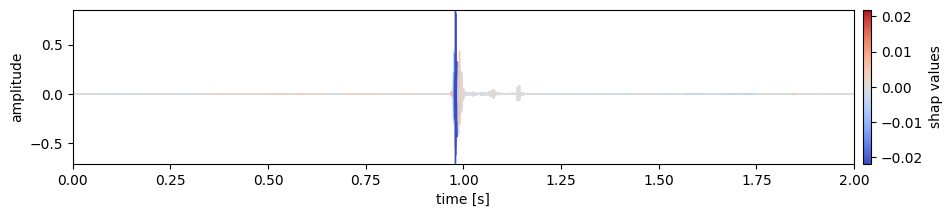

FN


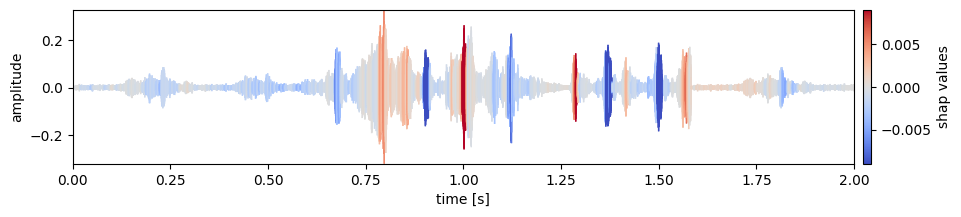

In [12]:
for i, title in zip(samples, sample_titles):
    print(title)
    shap_plots.shap_time_plot(i, times, wav_records, shap_values, labels, fs)

TP


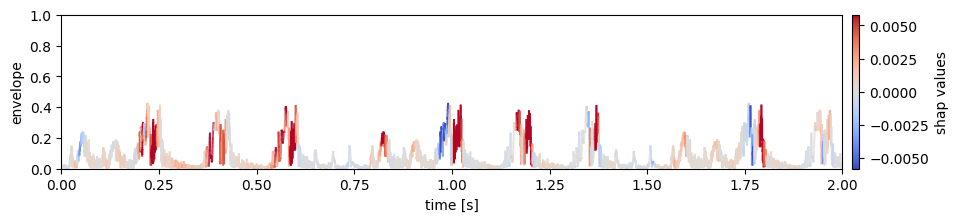

TN


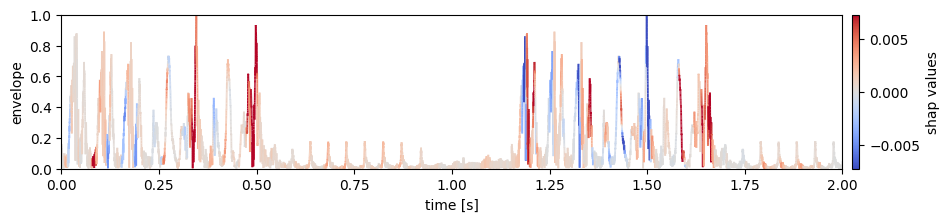

FP


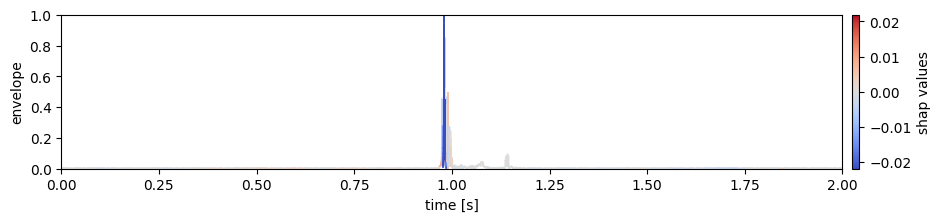

FN


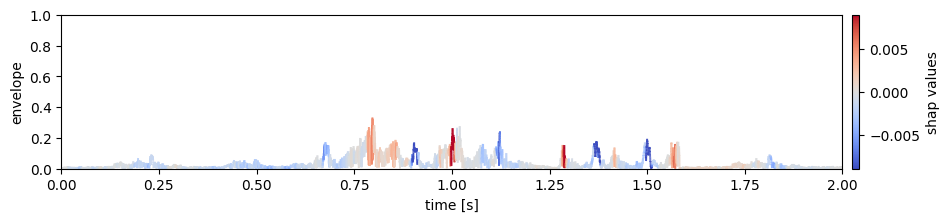

In [13]:
for i, title in zip(samples, sample_titles):
    print(title)
    shap_plots.shap_signal_envelope_plot(i, times, wav_records, shap_values, labels, fs)

In [14]:
# for i, title in zip(samples, sample_titles):
#     print(title)
#     shap_plots.shap_instantaneous_frequency_plot(i, times, wav_records, shap_values, labels, fs)

In [15]:
# for i, title in zip(samples, sample_titles):
#     print(title)
#     shap_plots.shap_pitch_plot(i, wav_records, shap_values, labels, fs)

## Global frequency contributions

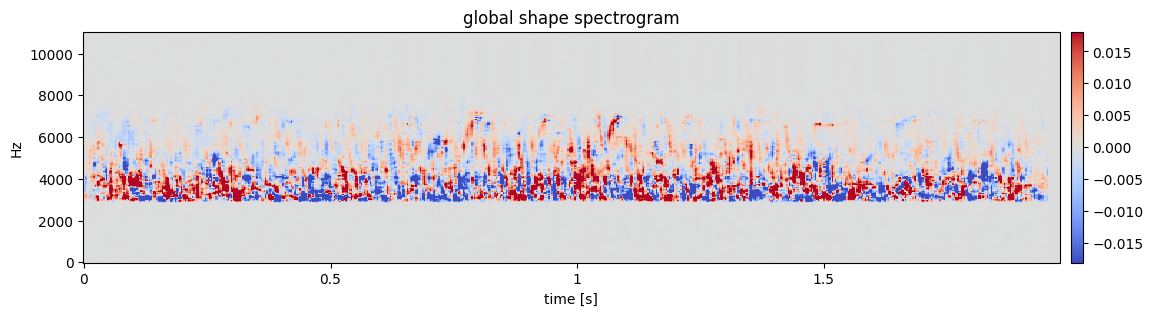

In [16]:
def shap_global_spectrogram_plot(shap_values, fs, nfft, winstep, winlen):
    shape_spectrogram = np.zeros(shap_values[1][0,:,:,0].T.shape)

    for i in range(len(shap_values[1])):
        shape_spectrogram += shap_values[1][i,:,:,0].T

    plt.figure(figsize=(15,3))
    librosa.display.specshow(10*shape_spectrogram, sr = fs, n_fft=nfft, hop_length=winstep, win_length=winlen,
                            x_axis='time', y_axis='linear', vmin=-np.max(np.abs(shape_spectrogram)),
                            vmax=np.max(np.abs(shape_spectrogram)), cmap='coolwarm')
    plt.title('global shape spectrogram')
    plt.colorbar(pad=0.01)
    plt.xlabel('time [s]')
    plt.ylabel('Hz')
    plt.show()

shap_global_spectrogram_plot(shap_values, fs, nfft, winstep, winlen)

In [1]:
def shap_global_spectrogram_plot(shap_values, fs, nfft, winstep, winlen):
    shape_spectrogram = np.zeros(shap_values[1][:,0,:,0].T.shape)

    for i in range(len(shap_values[1][0])):
        shape_spectrogram += shap_values[1][:,i,:,0].T
    
    print(shape_spectrogram.shape)
    print(np.array(shap_values).shape)

    plt.figure(figsize=(15,3))
    #"""
    librosa.display.specshow(10*shape_spectrogram, sr = fs, n_fft=nfft, hop_length=winstep, win_length=winlen,
                            x_axis='time', y_axis='linear', vmin=-np.max(np.abs(shape_spectrogram)),
                            vmax=np.max(np.abs(shape_spectrogram)), cmap='coolwarm')
    #"""

    plt.title('global shape spectrogram')
    plt.ylim((2900,8000))
    plt.colorbar(pad=0.01)
    plt.xlabel('Time [s]')
    plt.ylabel('Hz')
    plt.show()

shap_global_spectrogram_plot(shap_values, fs, nfft, winstep, winlen)

NameError: name 'shap_values' is not defined

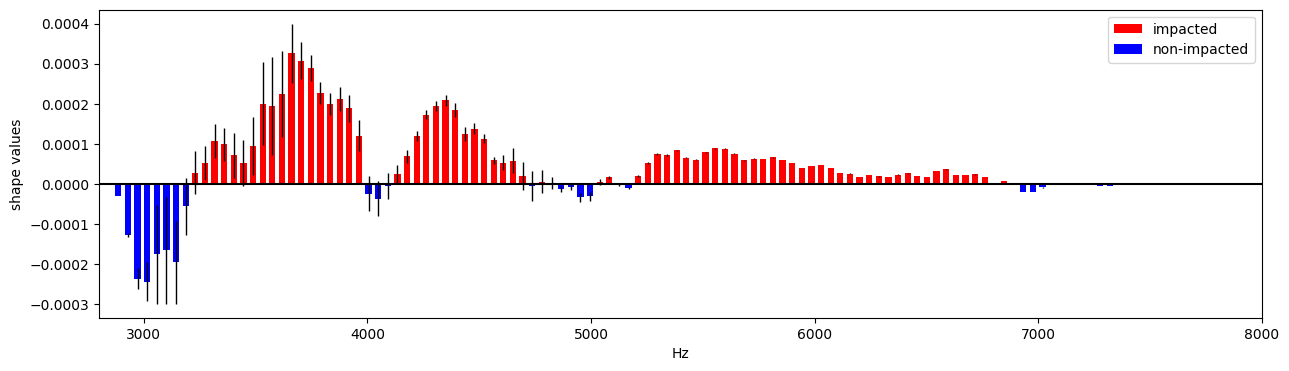

In [18]:
shap_plots.shap_global_frequency_plot(freqs, shap_values, fmin = 2800, fmax = 8000)

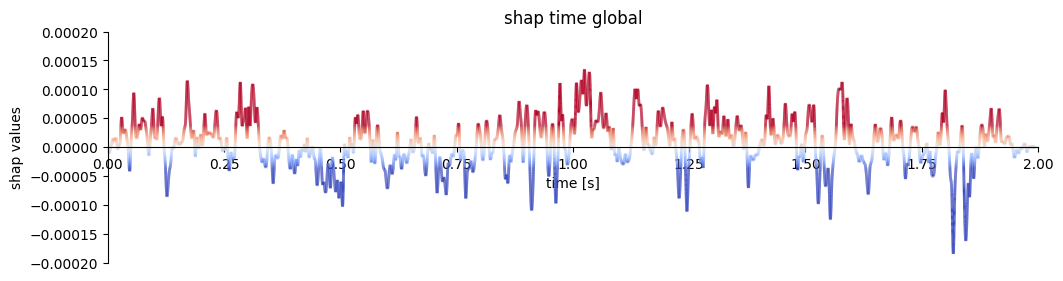

In [19]:
shap_plots.shap_global_time_plot(1, times, shap_values)

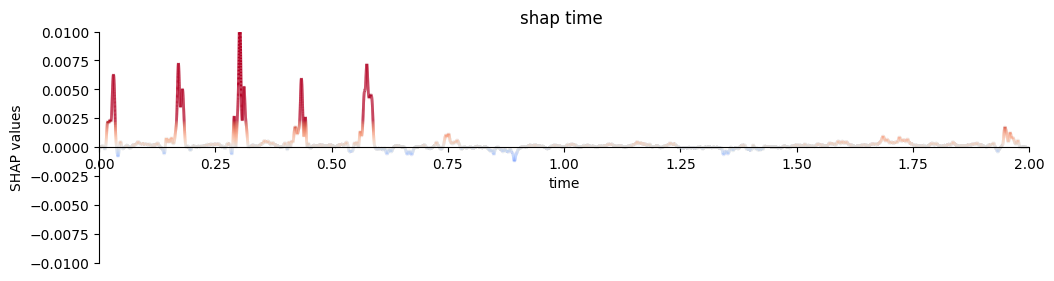

In [20]:
shap_plots.shap_time_plot2(1, times, shap_values)

TP


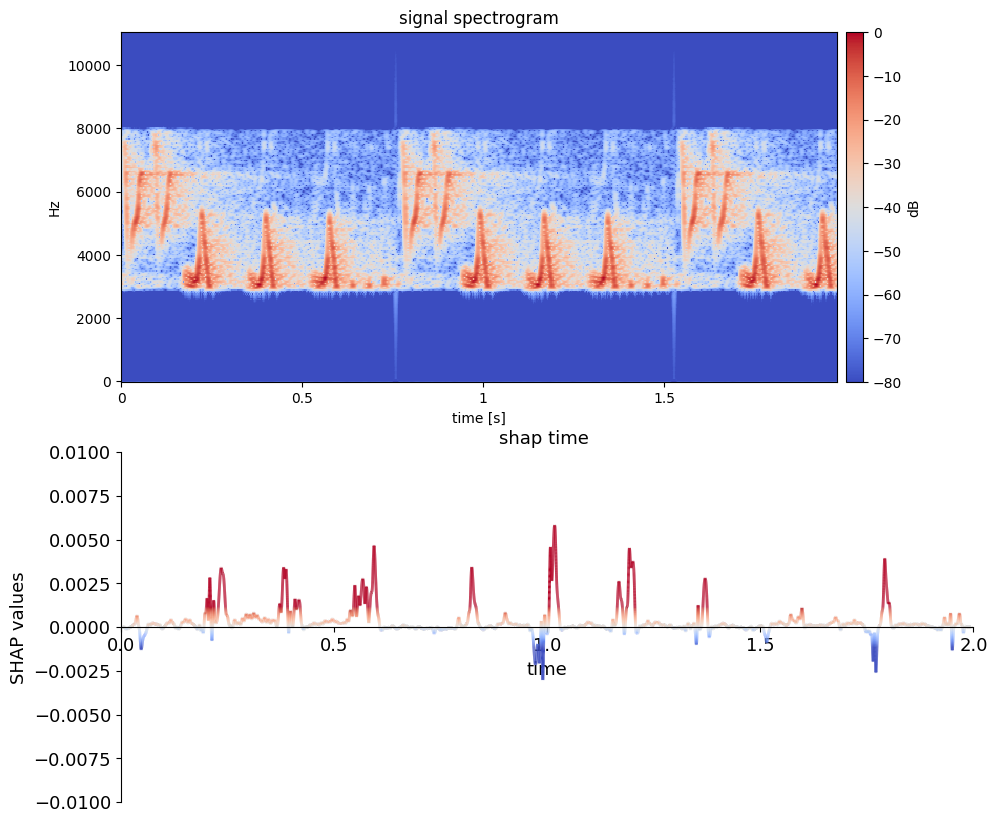

TN


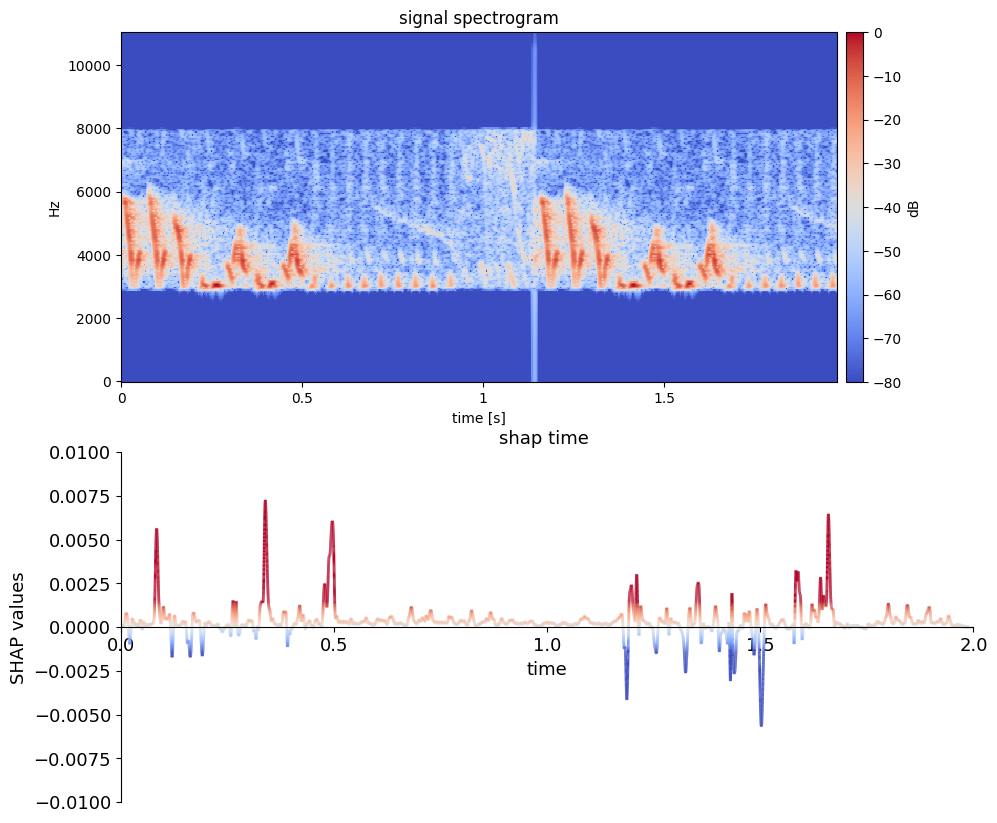

FP


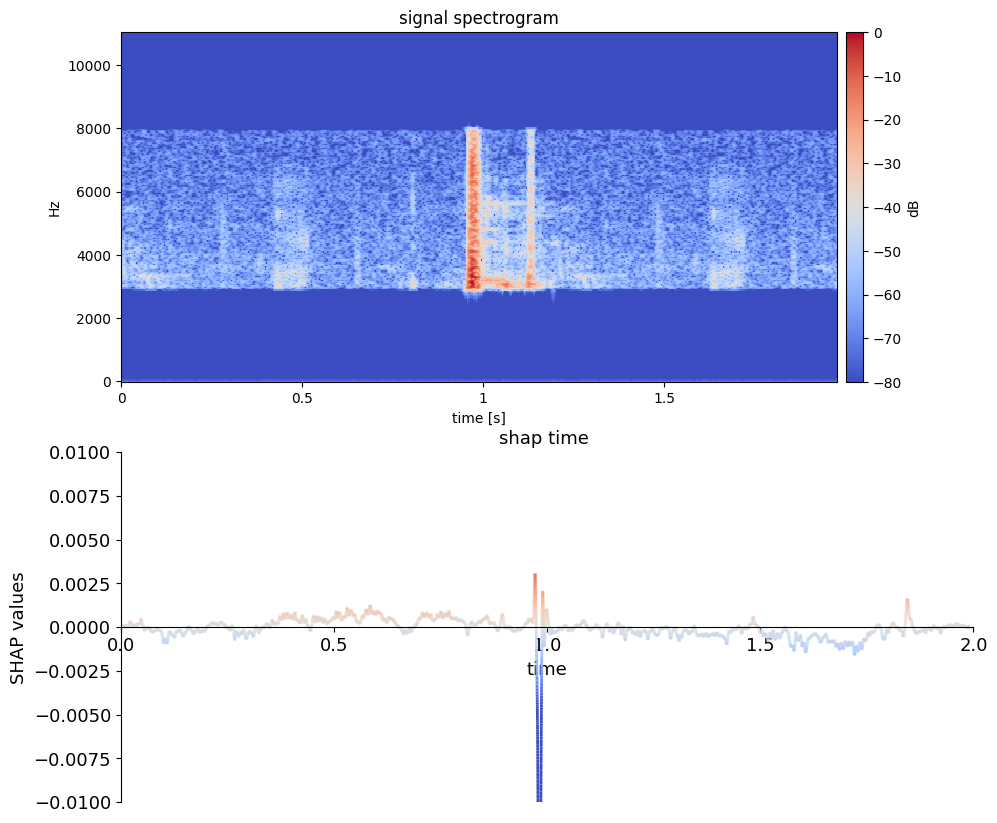

FN


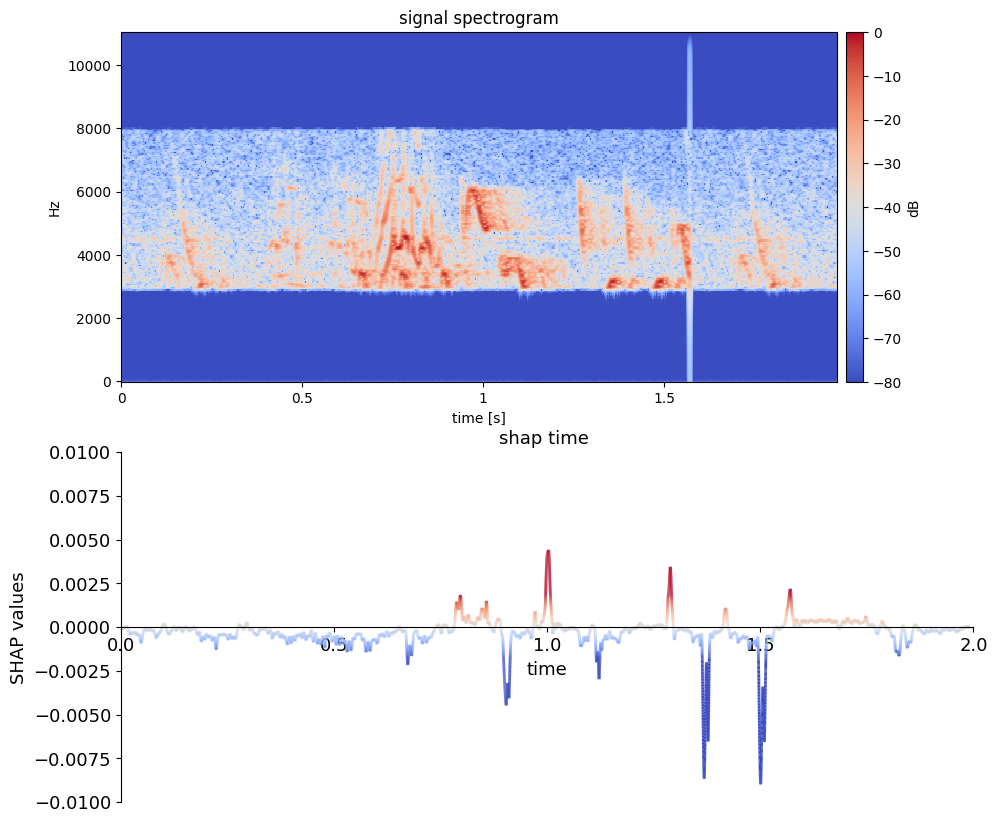

In [21]:
for i, title in zip(samples, sample_titles):
    print(title)
    shap_plots.shap_time_plot3(i, times, shap_values, labels, spectrograms,  nfft, winstep, winlen,fs)

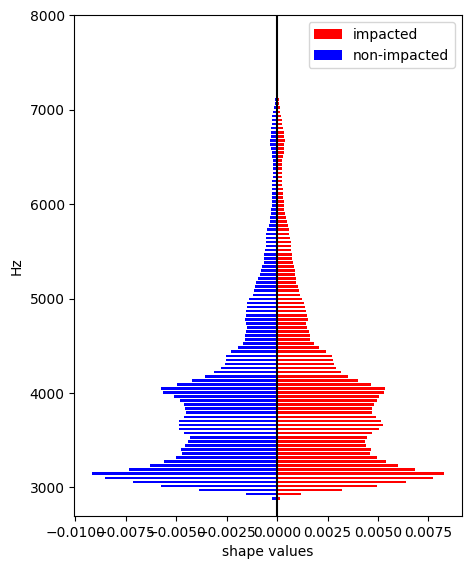

In [22]:
shap_plots.shap_global_frequency_plot_vertical(freqs, shap_values, labels, fmin = 2700, fmax = 8000)